# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "lateral_twopop_virtual")
network_file = os.path.join(network_path, "network-synapses-virtual.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-12Hz-virtual-5Hz.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-12Hz-virtual-5Hz.hdf5")
duration = 5

# Plot network

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/lateral_twopop_virtual/network-config.json
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons


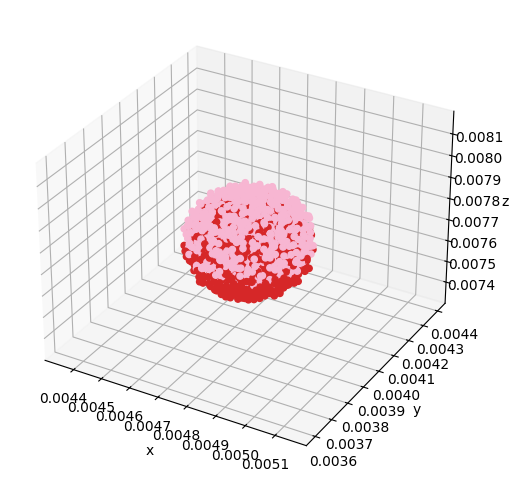

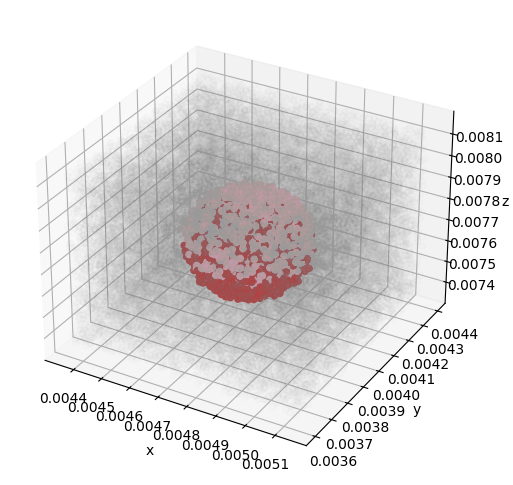

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/lateral_twopop_virtual/network-config.json
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons
Population unit 0 has 38000 neurons
Population unit 1 has 1000 neurons
Population unit 2 has 1000 neurons


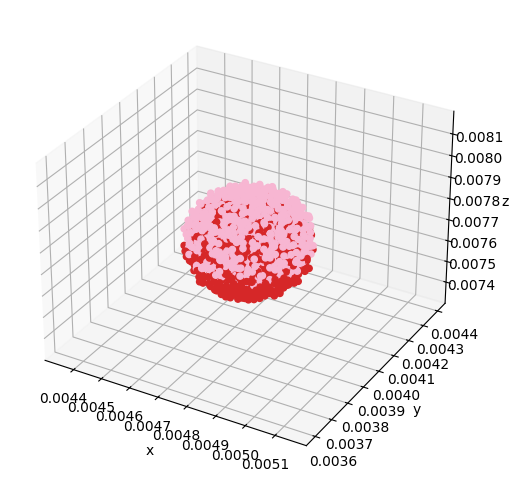

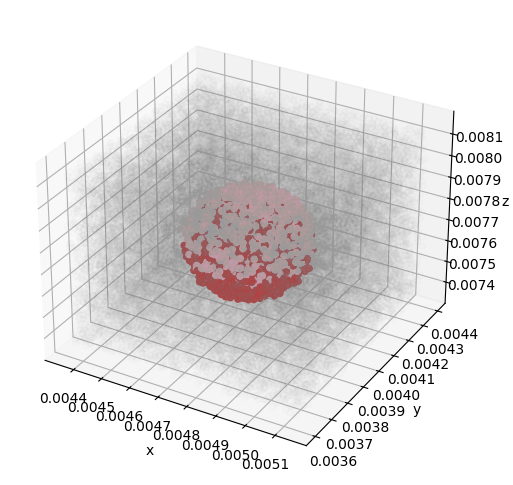

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

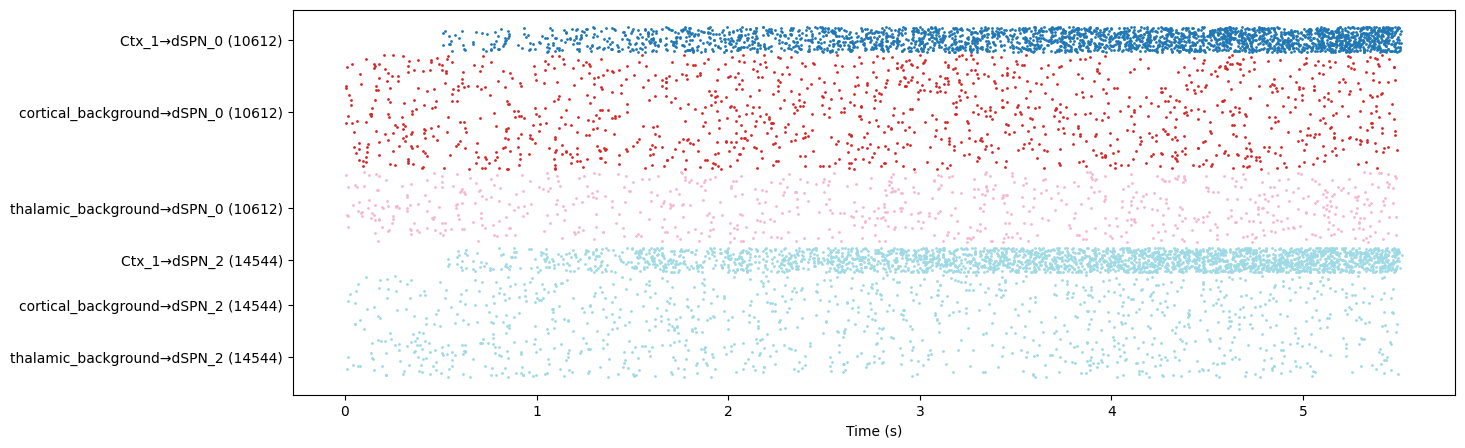

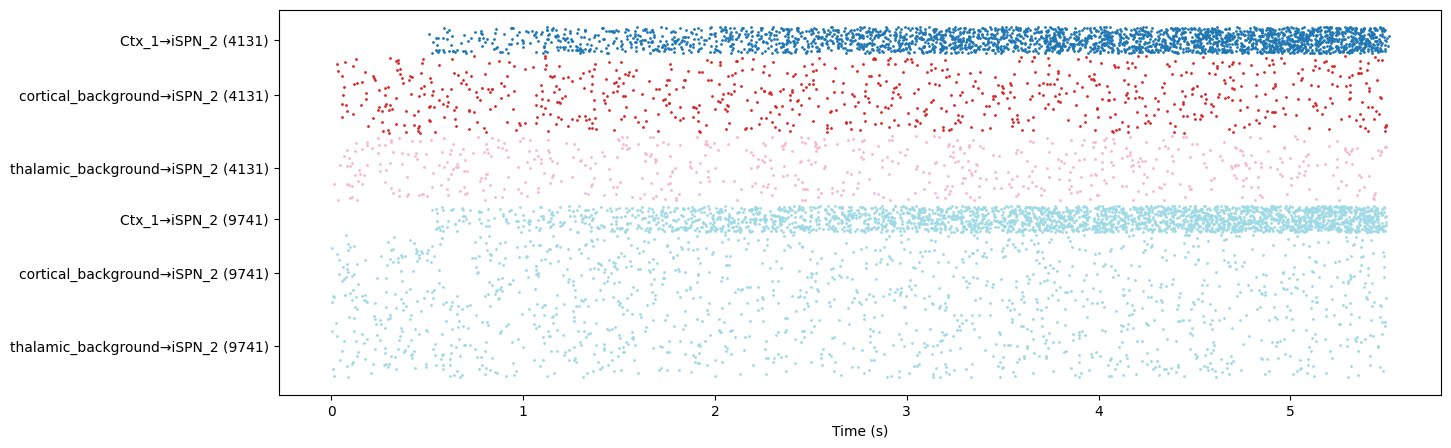

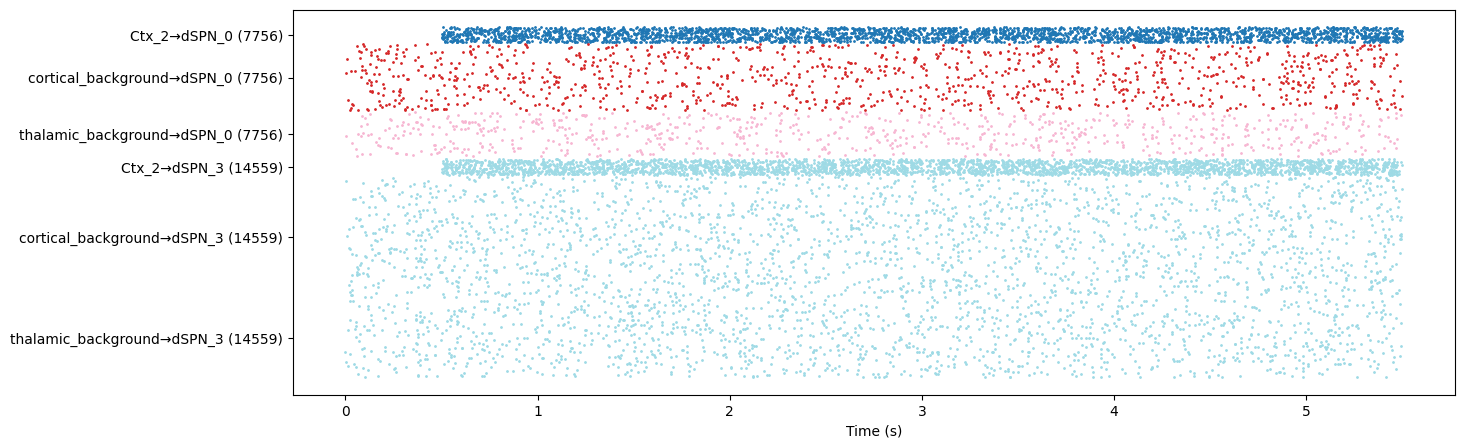

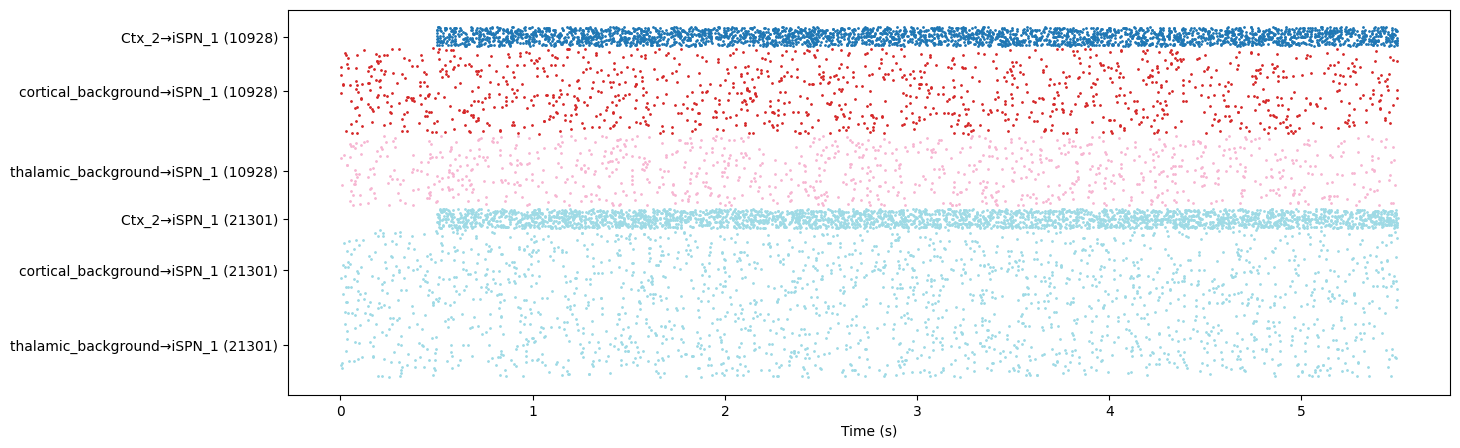

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

Loading ../networks/lateral_twopop_virtual/simulation/output-with-synapses-12Hz-virtual-5Hz.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2263  2288  3816 ... 30316 30321 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
4022: (iSPN_0, p635b801c, m7bc82287)
4025: (iSPN_0, p039c9f4f, mf2f3395e)
4041: (iSPN_0, p635b801c, m7bc82287)
4171: (iSPN_3, p57956f10, m1083058d)
7144: (iSPN_0, p581376d6, mf2f3395e)
7925: (iSPN_0, p581376d6, mc16840cd)
7941: (iSPN_0, p635b801c, m3a845add)
7946: (iSPN_0, p039c9f4f, mdefb8b16)
7954: (iSPN_0, p67dac726, m7bc82287)
7959: (iSPN_0, p635b801c, mc16840cd)
7960: (iSPN_0, p581376d6, md0f5647c)
7966: (iSPN_0, p039c9f4f, mc16840cd)
7975: (iSPN_0, p581376d6, mc16840cd)
9206: (iSPN_0, pf721cf77, m7bc82287)
9211: (iSPN_0, p581376d6, mc16840cd)
9228: (iSPN_0, p039c9f4f, md0f5647c)
9415: (dSPN_0, p7aa400d6, m9fda9b20)
9603: (iSPN_0, pfb05971b, m7bc82287)
9618: (iSPN_0, p635b801c, mc16840cd)
9623:

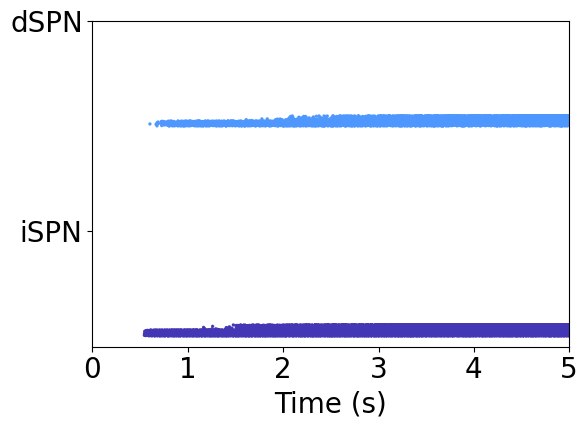

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

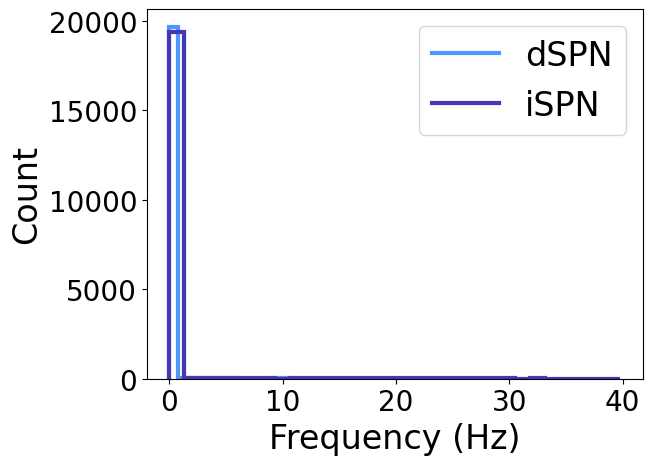

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/lateral_twopop_virtual/figures/spike-frequency-pop-units0-1-2.pdf


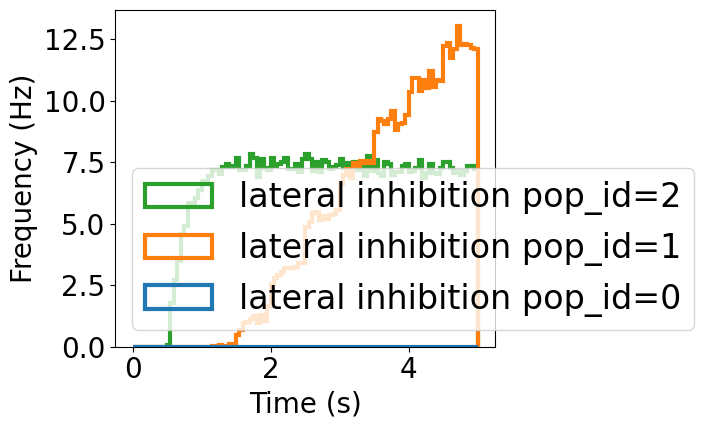

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

Loading ../networks/lateral_twopop_virtual/simulation/output-no-synapses-12Hz-virtual-5Hz.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2263  2288  3816 ... 30316 30321 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
4022: (iSPN_0, p635b801c, m7bc82287)
4034: (iSPN_0, p635b801c, md0f5647c)
4047: (iSPN_0, p635b801c, m6486ed26)
7144: (iSPN_0, p581376d6, mf2f3395e)
7164: (iSPN_0, pf721cf77, m6486ed26)
7177: (iSPN_0, p581376d6, mf2f3395e)
7184: (iSPN_0, p67dac726, m6486ed26)
7322: (iSPN_3, p57956f10, m1083058d)
7918: (iSPN_0, pf721cf77, mf2f3395e)
7922: (iSPN_0, p581376d6, m3a845add)
7924: (iSPN_0, p67dac726, m3a845add)
7925: (iSPN_0, p581376d6, mc16840cd)
7941: (iSPN_0, p635b801c, m3a845add)
7958: (iSPN_0, pf721cf77, m3a845add)
7959: (iSPN_0, p635b801c, mc16840cd)
7965: (iSPN_0, pfb05971b, m6486ed26)
7967: (iSPN_0, p67dac726, m6486ed26)
7969: (iSPN_0, p635b801c, m6486ed26)
7972: (iSPN_0, p635b801c, mf2f3395e)
7976: (

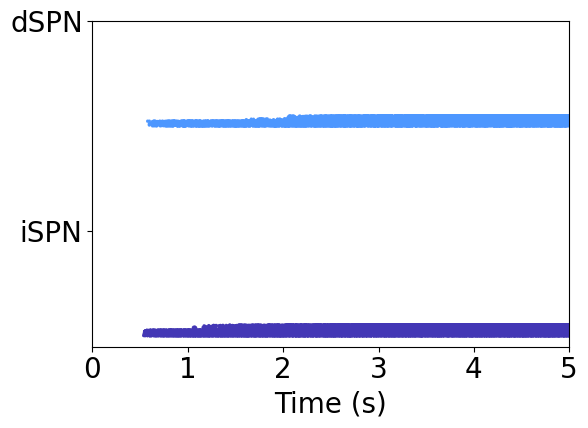

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

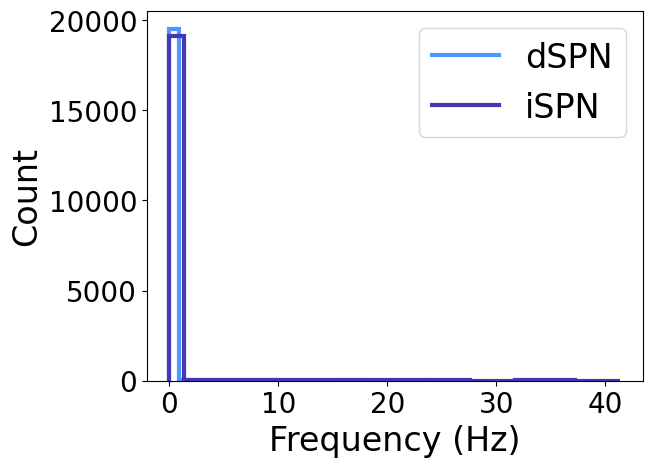

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/lateral_twopop_virtual/figures/spike-frequency-pop-units0-1-2.pdf


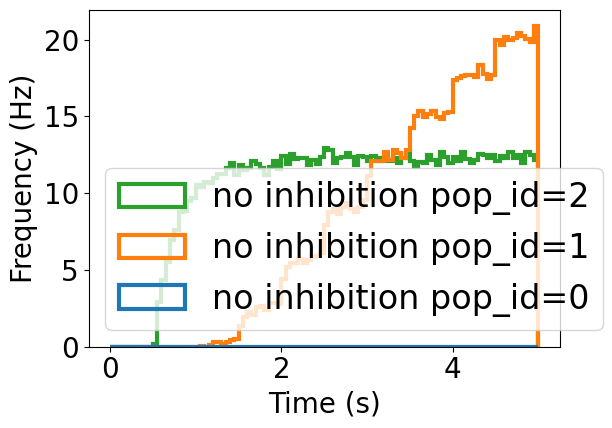

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/lateral_twopop_virtual/figures/spike-frequency-pop-units0-1-2.pdf


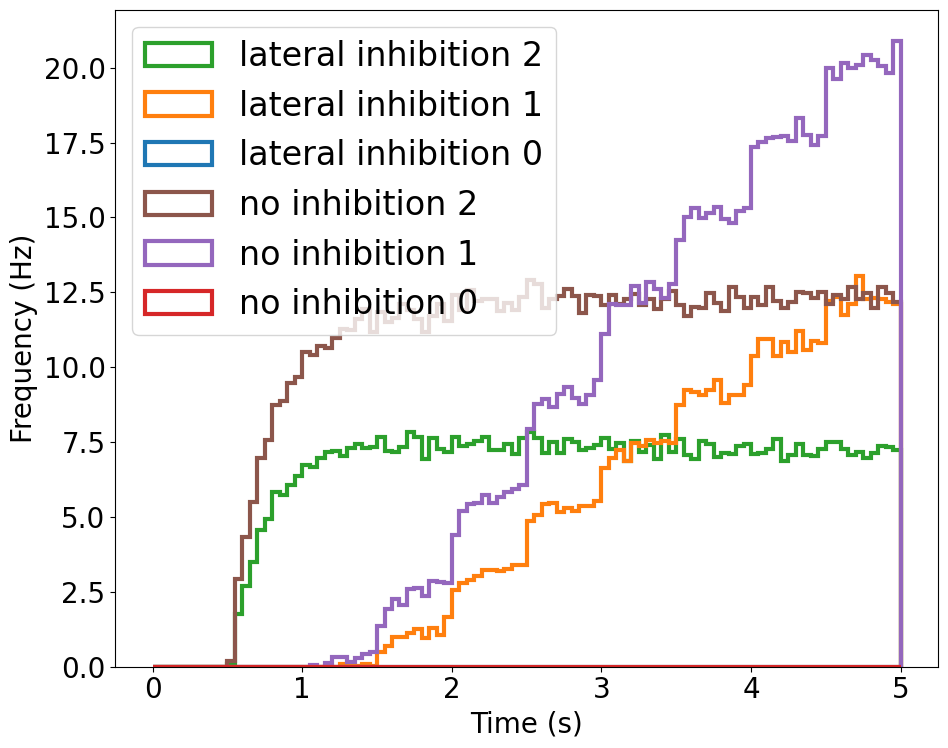

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [14]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/lateral_twopop_virtual/network-synapses-virtual.hdf5
Loading input info from ../networks/lateral_twopop_virtual/input-spikes.hdf5
Loading ../networks/lateral_twopop_virtual/simulation/output-with-synapses-12Hz-virtual-5Hz.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2263  2288  3816 ... 30316 30321 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
4022: (iSPN_0, p635b801c, m7bc82287)
4025: (iSPN_0, p039c9f4f, mf2f3395e)
4041: (iSPN_0, p635b801c, m7bc82287)
4171: (iSPN_3, p57956f10, m1083058d)
7144: (iSPN_0, p581376d6, mf2f3395e)
7925: (iSPN_0, p581376d6, mc16840cd)
7941: (iSPN_0, p635b801c, m3a845add)
7946: (iSPN_0, p039c9f4f, mdefb8b16)
7954: (iSPN_0, p67dac726, m7bc82287)
7959: (iSPN_0, p635b801c, mc16840cd)
7960: (iSPN_0, p581376d6, md0f5647c)
7966: (iSPN_0, p039c9f4f, mc16840cd)
7975: (iSPN_0, p581376d6, mc16840cd)
9206: (iSPN_0, pf721cf77, m7bc82287)
9211: (iSPN_0, p581376

In [15]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2263 2288 3816 3819 3831 3841 3842 3845 3847 3854 3856 3857 3861 3862
 3863 3881 3882 3895 3897 3898 3899 3901 3903 3904 3906 3914 3916 3921
 3922 3923]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--dSPN-iSPN.pdf


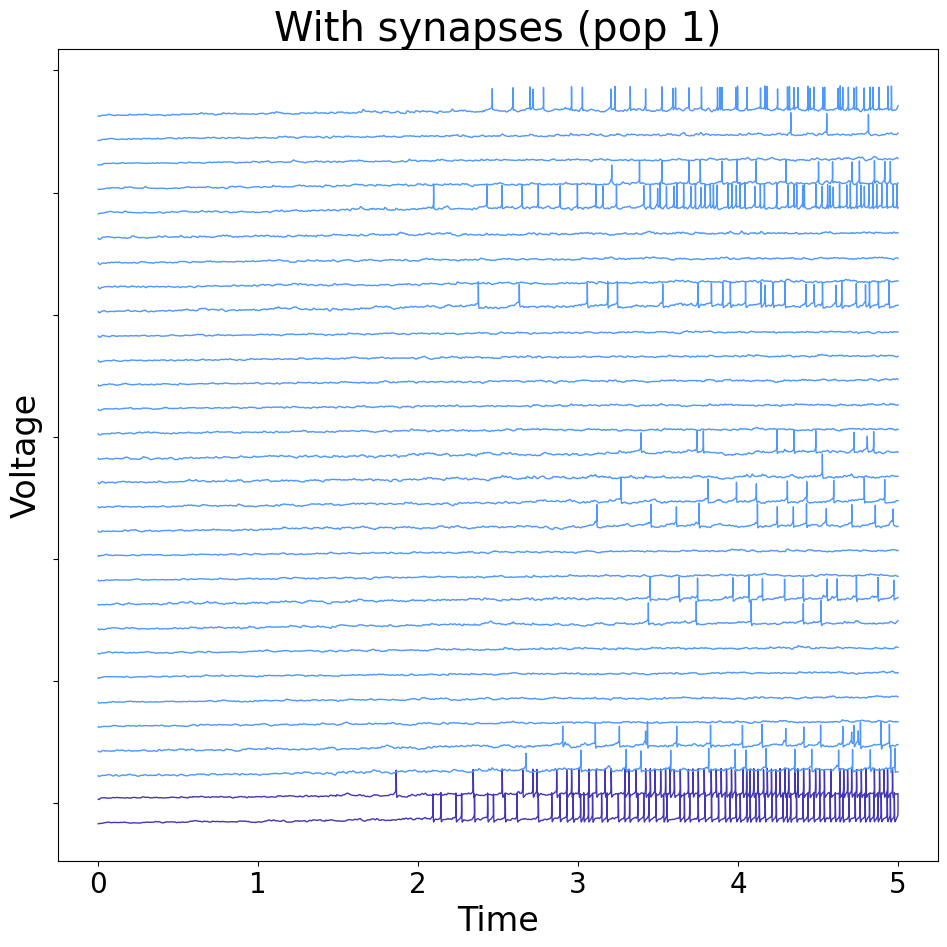

In [16]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [3823 3844 3849 3859 3880 3891 3929 3937 3954 3956 3958 4000 4038 4043
 4044 4060 4063 4064 4088 4089 4109 4115 4118 4122 4137 4147 4149 4160
 4162 4190]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--dSPN-iSPN.pdf


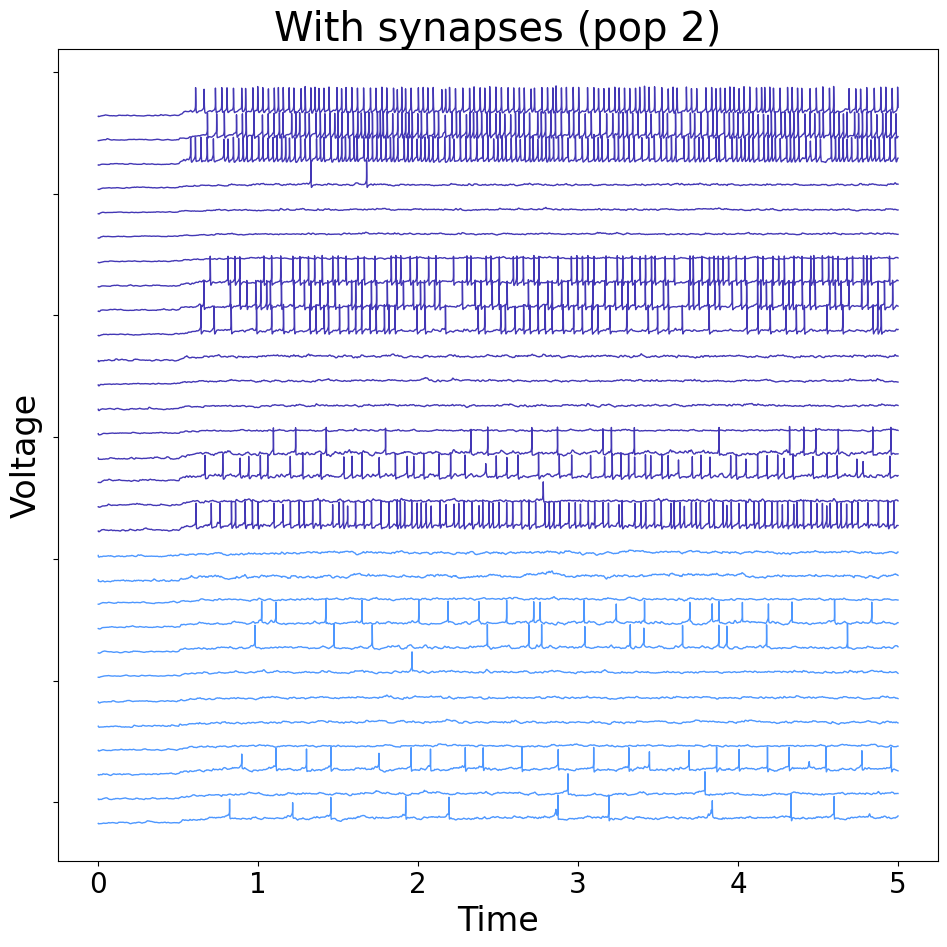

In [17]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [18]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/lateral_twopop_virtual/network-synapses-virtual.hdf5
Loading input info from ../networks/lateral_twopop_virtual/input-spikes.hdf5
Loading ../networks/lateral_twopop_virtual/simulation/output-no-synapses-12Hz-virtual-5Hz.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2263  2288  3816 ... 30316 30321 30347]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
4022: (iSPN_0, p635b801c, m7bc82287)
4034: (iSPN_0, p635b801c, md0f5647c)
4047: (iSPN_0, p635b801c, m6486ed26)
7144: (iSPN_0, p581376d6, mf2f3395e)
7164: (iSPN_0, pf721cf77, m6486ed26)
7177: (iSPN_0, p581376d6, mf2f3395e)
7184: (iSPN_0, p67dac726, m6486ed26)
7322: (iSPN_3, p57956f10, m1083058d)
7918: (iSPN_0, pf721cf77, mf2f3395e)
7922: (iSPN_0, p581376d6, m3a845add)
7924: (iSPN_0, p67dac726, m3a845add)
7925: (iSPN_0, p581376d6, mc16840cd)
7941: (iSPN_0, p635b801c, m3a845add)
7958: (iSPN_0, pf721cf77, m3a845add)
7959: (iSPN_0, p635b801c

In [19]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2263 2288 3816 3819 3831 3841 3842 3845 3847 3854 3856 3857 3861 3862
 3863 3881 3882 3895 3897 3898 3899 3901 3903 3904 3906 3914 3916 3921
 3922 3923]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--dSPN-iSPN.pdf


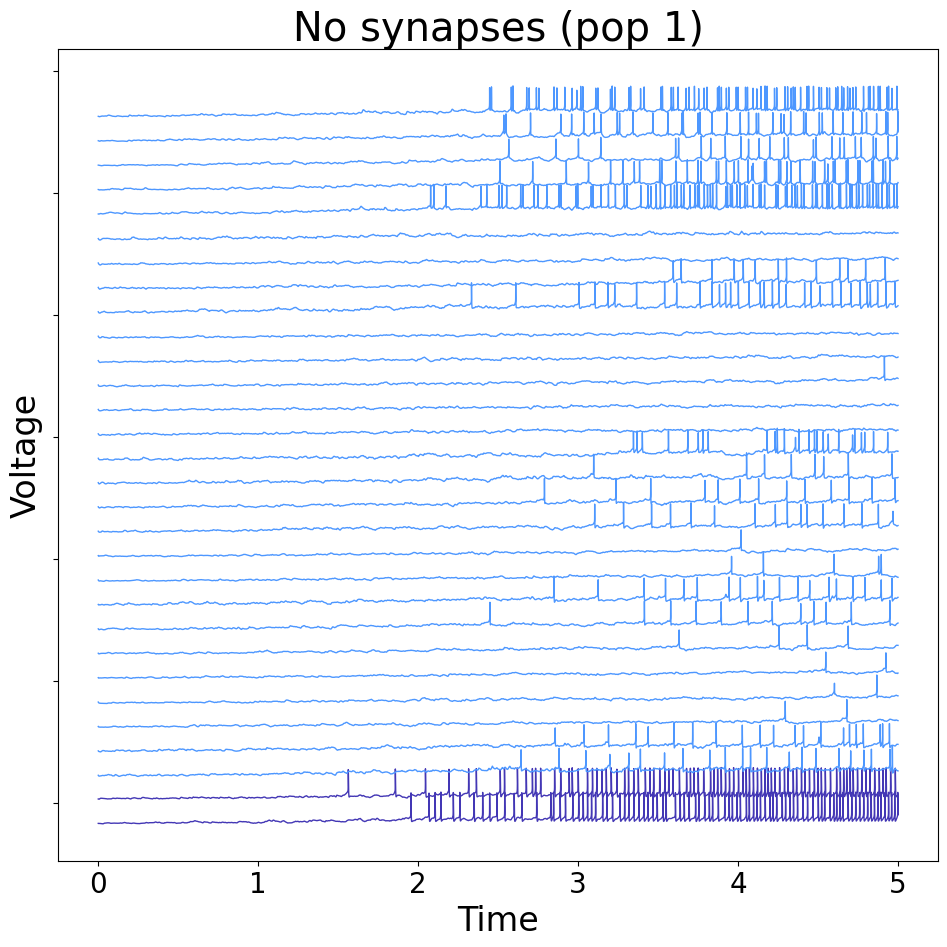

In [20]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [3823 3844 3849 3859 3880 3891 3929 3937 3954 3956 3958 4000 4038 4043
 4044 4060 4063 4064 4088 4089 4109 4115 4118 4122 4137 4147 4149 4160
 4162 4190]
Plotted 30 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--dSPN-iSPN.pdf


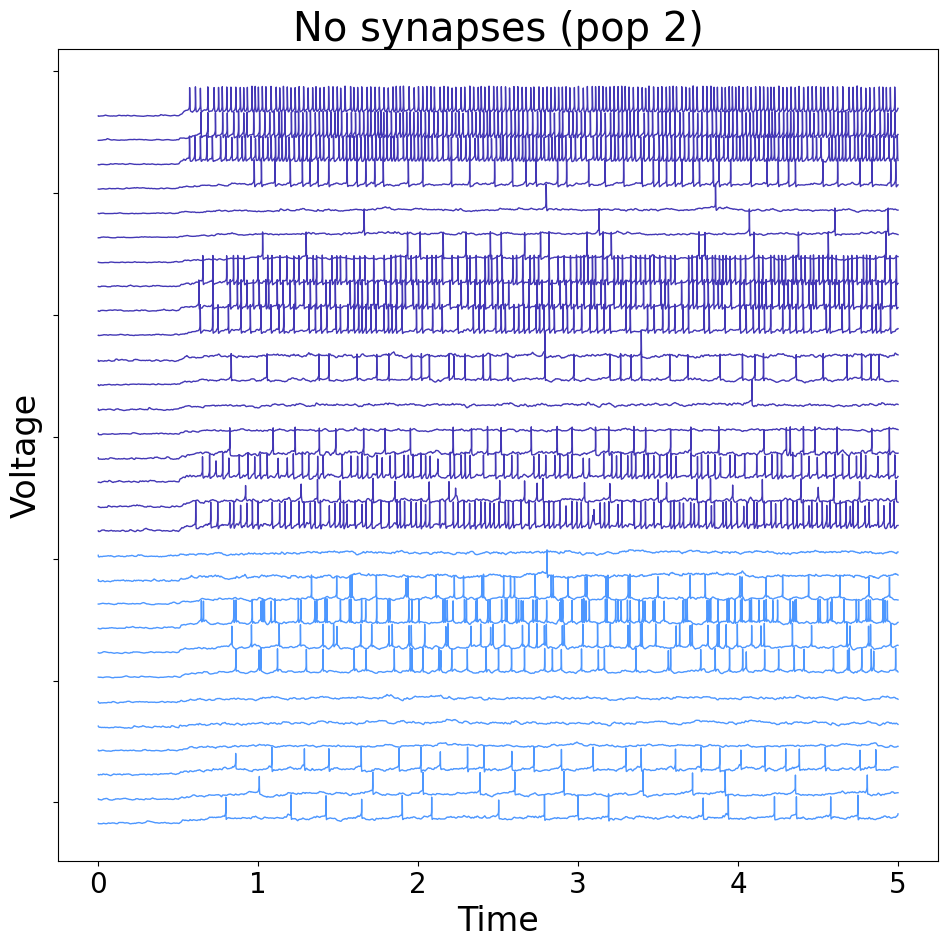

In [21]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,5),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [22]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 4022  4025  4041  4171  7144  7954  7959  7960  9211  9415  9623  9640
  9647 10823 10840 14600 15748 15903 21278 21424]
Plotted 20 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--dSPN-iSPN.pdf


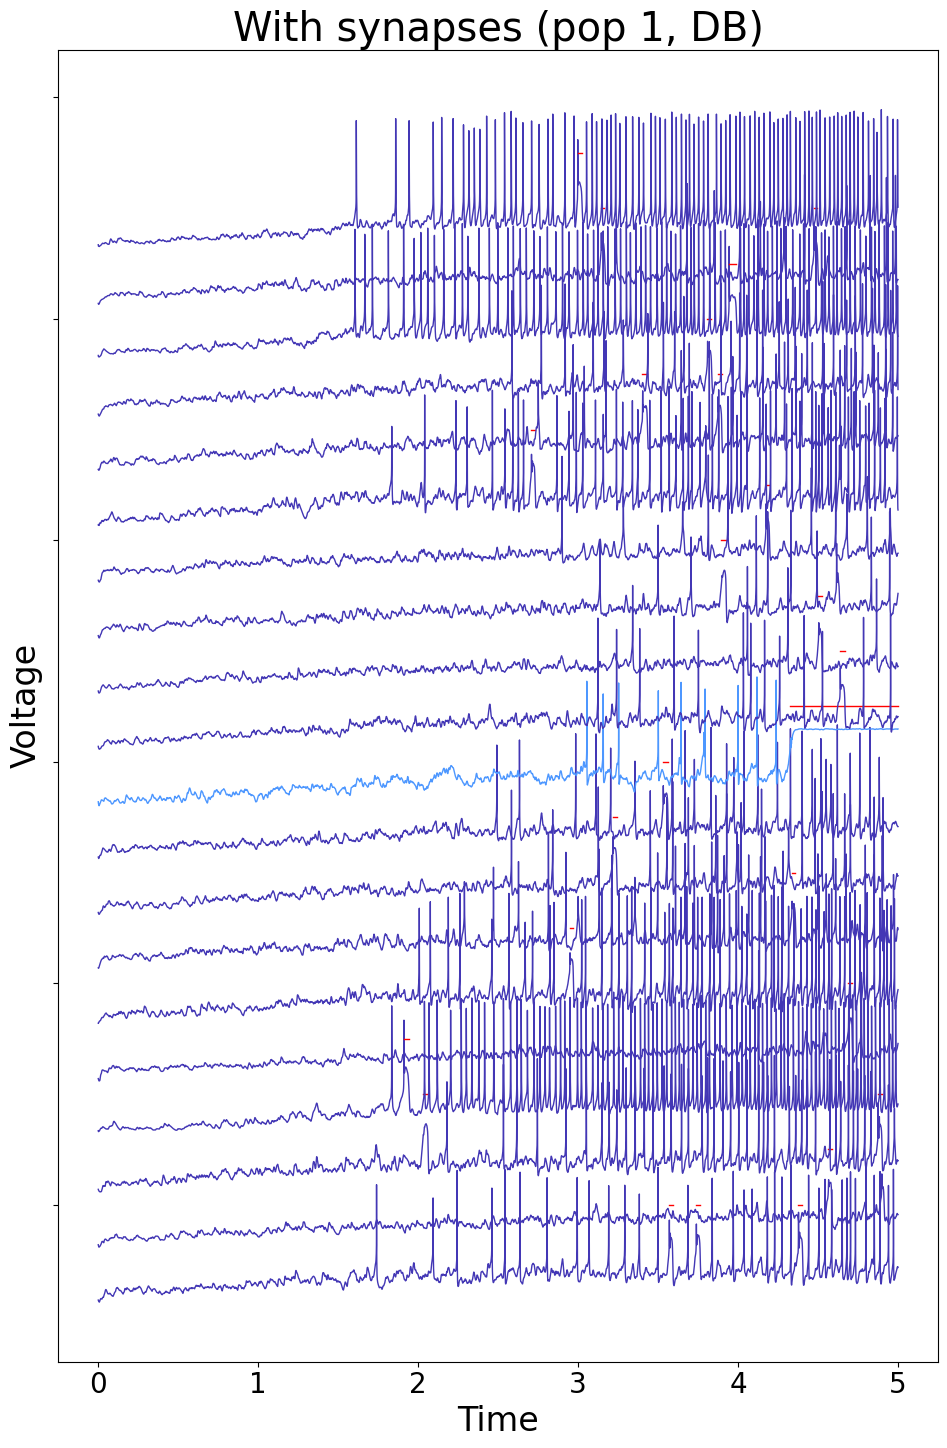

In [23]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [ 7925  7941  7946  7966  7975  9206  9228  9603  9618 14608 14628 14640
 14650 15381 15764 15765 15777 16556 19099 19133 19134 24640 24642 30217]
Plotted 24 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--iSPN-traces.pdf


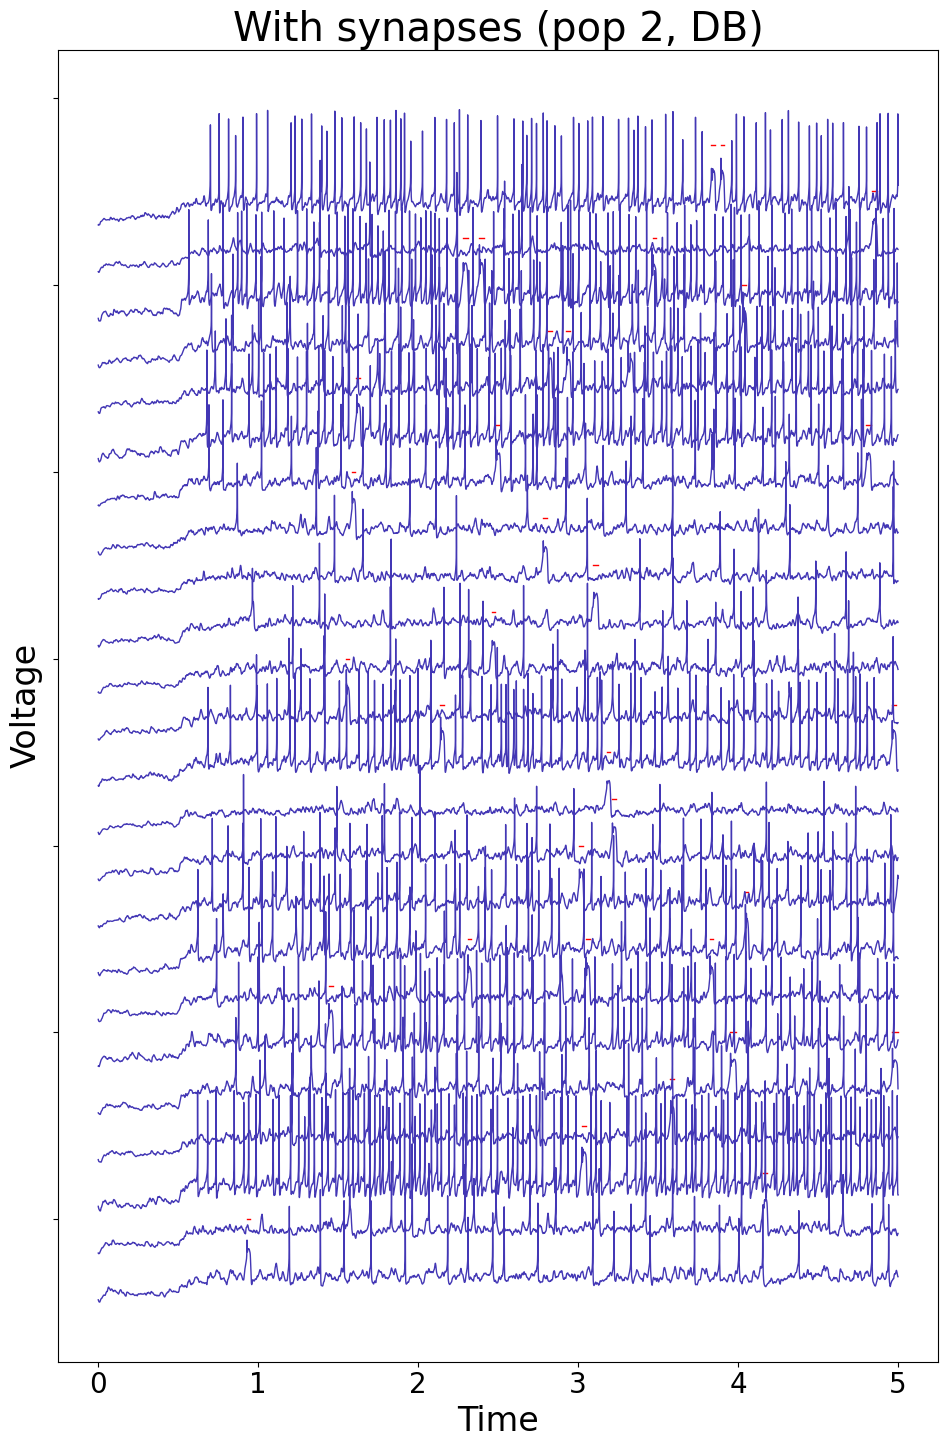

In [24]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 4022  4034  4047  7144  7164  7184  7322  7918  7958  7959  7967  9215
  9253  9616  9640  9643  9647 10606 10823 10827 10831 10832 10844 10859
 14602 14619 15191 15746 15774 15789 15792 15903 15928 21128 21266 21278
 21279 21424]
Plotted 38 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--dSPN-iSPN.pdf


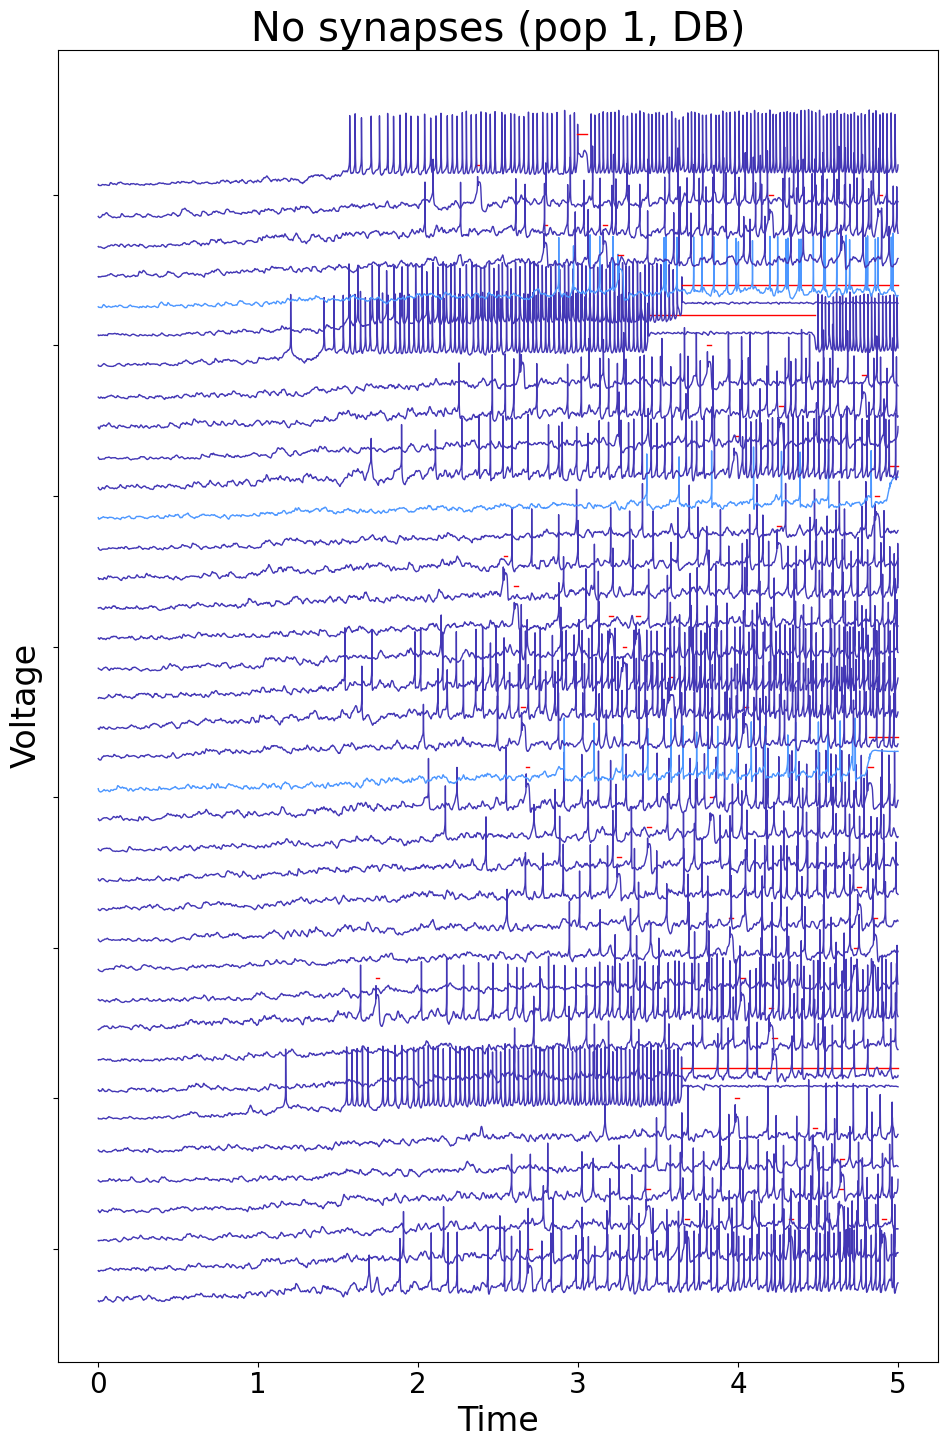

In [25]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 7177  7922  7924  7925  7941  7965  7969  7972  7976  9055  9206  9257
  9617  9626  9635 10835 10855 14517 14597 14601 14626 14627 14628 14634
 14641 14650 14654 15349 15379 15655 15750 15755 15762 15763 15764 15765
 15768 15777 15781 15790 16134 16175 16324 16556 16557 16568 19111 21259
 21271 24631 24636 26759 26770 27472 27497 30021]
Plotted 56 traces (total 2000)
Saving to figure /NOBACKUP2/hjorth/networks-lateral/lateral_twopop_virtual/figures/Network-voltage-trace--dSPN-iSPN.pdf


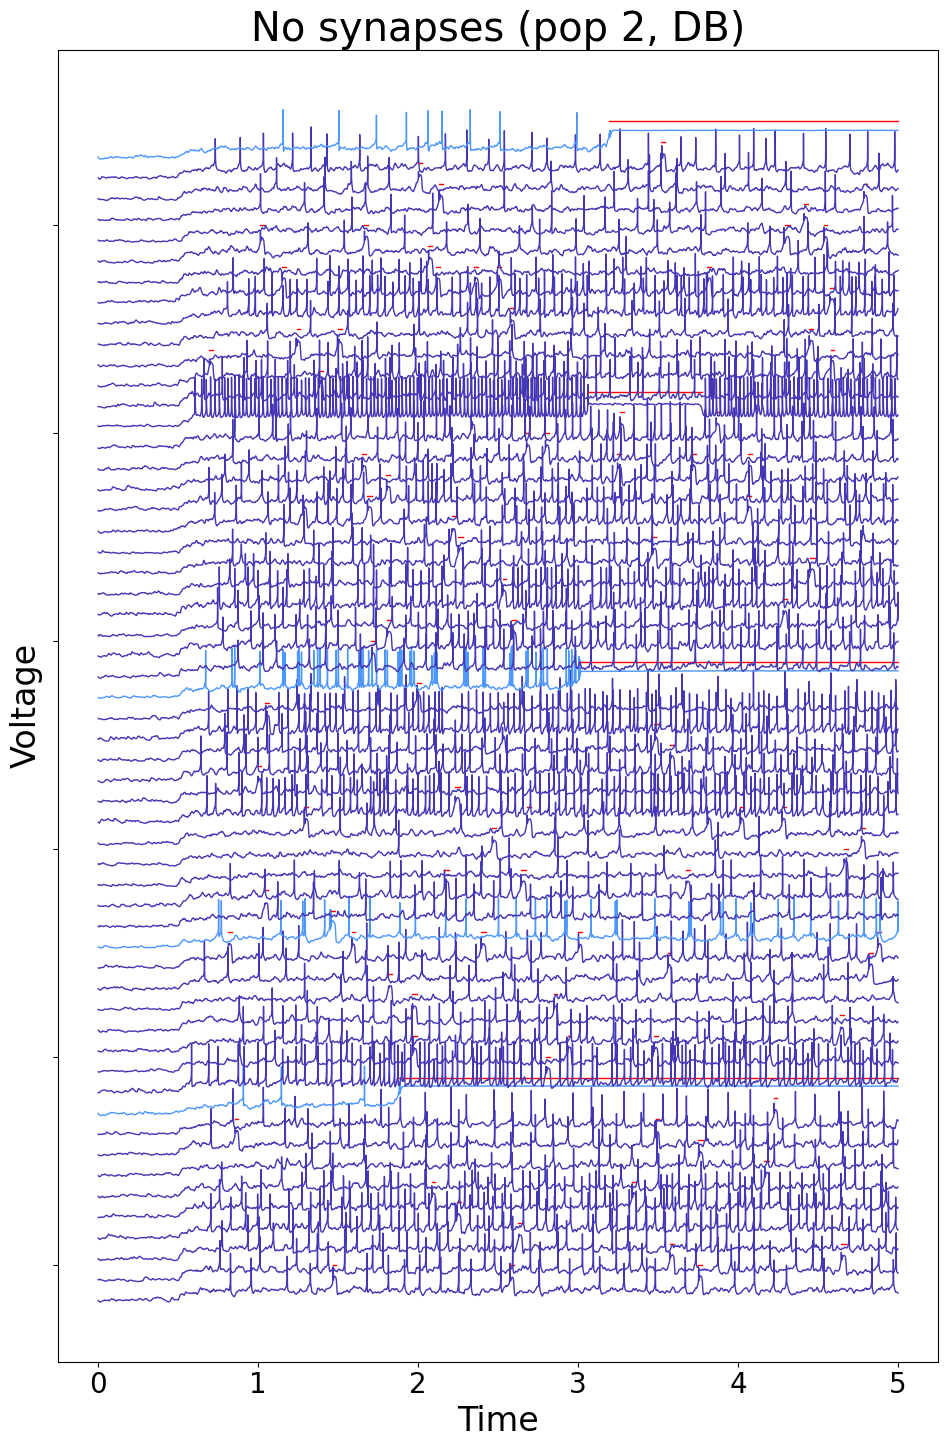

In [26]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,5),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)